In [1]:
import pandas as pd
import numpy as np
from data_master import DataMaster
from utils import func
from scipy.stats import norm
master = DataMaster()
from utils.func import center
from quantstats.stats import sharpe
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:

market_data = pd.read_parquet('data/US/test_mkt_data.pq')
dividends = pd.read_parquet('data/US/test_dividends.pq')
GICS = pd.read_parquet('data/US/test_GICS.pq')
P = pd.read_parquet('data/US/test_adv_table.pq')
P.index.names = ['Date']
R = market_data['close'].unstack().reindex_like(P).pct_change()
close = market_data['close'].unstack().reindex_like(P)

C:\Users\marti\AppData\Local\Temp\ipykernel_11636\1791651482.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  R = market_data['close'].unstack().reindex_like(P).pct_change()


In [4]:
dividends = pd.read_parquet('data/US/test_dividends.pq')
dividends = dividends.dropna()
dividends['declarationDate'] = pd.to_datetime(dividends['declarationDate'])
dividends['paymentDate'] = pd.to_datetime(dividends['paymentDate'])
dividends['recordDate'] = pd.to_datetime(dividends['recordDate'])
dividends = dividends[dividends['declarationDate'] < dividends['recordDate']]
dividends = dividends[dividends['recordDate'] < dividends['paymentDate']]
dividends = dividends.reset_index(level=0,drop=True).set_index('declarationDate',append=True)
dividends.index.names = ['Ticker','Date']
dividends = dividends.swaplevel()
dividends['n_days_record'] = (dividends['recordDate'] - dividends.index.to_series().apply(lambda x : x[0])).dt.days
dividends = dividends[dividends['n_days_record']<=100]
dividends = dividends[~dividends.index.duplicated(keep='last')]

In [9]:
dividends.xs('AAPL',level=1)

,recordDate,paymentDate,period,value,unadjustedValue,currency,n_days_record
Date,,,,,,,
2012-07-24,2012-08-13,2012-08-16,Quarterly,0.0946,2.6488,USD,20
2012-10-25,2012-11-12,2012-11-15,Quarterly,0.0946,2.6488,USD,18
2013-01-23,2013-02-11,2013-02-14,Quarterly,0.0946,2.6488,USD,19
2013-04-23,2013-05-13,2013-05-16,Quarterly,0.1089,3.0492,USD,20
2013-07-23,2013-08-12,2013-08-15,Quarterly,0.1089,3.0492,USD,20
2013-10-28,2013-11-11,2013-11-14,Quarterly,0.1089,3.0492,USD,14
2014-01-27,2014-02-10,2014-02-13,Quarterly,0.1089,3.0492,USD,14
2014-04-23,2014-05-12,2014-05-15,Quarterly,0.1175,3.2900,USD,19
2014-07-22,2014-08-11,2014-08-14,Quarterly,0.1175,0.4700,USD,20


In [10]:
def get_ticker_data(ticker,dividends:pd.DataFrame= dividends, R: pd.DataFrame = R, close: pd.DataFrame= close, lookback_window:int = 63):

    dividend_ticker = dividends.xs(ticker,level=1)
    dividend_dates = dividend_ticker.index.tolist()[6:-1]

    results = pd.DataFrame(columns = ['div_yield','mkt_returns','past_returns','n_days_record','n_days_payment','no_div_cut','interim_returns','ex_date_returns'],index = dividend_dates)
    for div_date in dividend_dates:
        # try :
            ex_date = dividend_ticker.loc[div_date,'recordDate']- pd.DateOffset(days=1)
            payment_date =  dividend_ticker.loc[div_date,'paymentDate']
            n_days_record = (ex_date - div_date).days
            n_days_payment = (payment_date - ex_date).days
            value = dividend_ticker.loc[div_date,'value']
            last_price = close[ticker].loc[:div_date].iloc[-1]
            div_yield = (value / last_price) *100
            interim_returns = R.loc[div_date:ex_date][ticker].cumsum().iloc[-1]
            ex_date_returns = R.loc[ex_date:payment_date][ticker].cumsum().iloc[-1]
            mkt_returns = R.loc[:div_date].tail(lookback_window).mean(1).cumsum().iloc[-1]
            past_returns = R.loc[:div_date].tail(lookback_window)[ticker].cumsum().iloc[-1]
            div_cut = dividend_ticker.loc[:div_date].tail(8)
            div_cut = 1 if div_cut['value'].diff().min() >=0 else 0
            results.loc[div_date] = [div_yield,mkt_returns,past_returns,n_days_record,n_days_payment,div_cut,interim_returns,ex_date_returns]
        # except : 
            # pass
    return results

get_ticker_data('AAPL')

,div_yield,mkt_returns,past_returns,n_days_record,n_days_payment,no_div_cut,interim_returns,ex_date_returns
2014-01-27,0.019782,0.830498,0.039561,13,4,1,-0.045828,0.046894
2014-04-23,0.022392,0.054125,-0.043682,18,4,1,0.100701,0.005703
2014-07-22,0.12405,0.225202,-0.643565,19,4,1,0.009395,0.028893
2014-10-20,0.117783,0.17321,0.057189,20,4,1,0.110915,0.034585
2015-01-27,0.10766,0.395143,0.043804,12,4,1,0.053162,0.061945
2015-04-27,0.098002,0.454904,0.166841,13,4,1,-0.018947,0.010695
2015-07-21,0.099426,0.430879,0.034668,19,4,1,-0.131899,-0.001042
2015-10-27,0.113488,0.392491,-0.056963,12,4,1,0.050075,-0.044576
2016-01-26,0.130013,0.273883,-0.1643,12,4,1,-0.052354,-0.003307
2016-04-26,0.13656,4.844087,0.050663,12,4,1,-0.122271,-0.025653


In [11]:
data = []
tickers_passed = []
for ticker in tqdm(P.columns.tolist()):
    try :
        data_ticker = get_ticker_data(ticker)
        data.append(data_ticker)
        tickers_passed.append(ticker)
    except :
        pass

100%|██████████| 878/878 [00:49<00:00, 17.65it/s]


In [12]:
res = pd.concat(data,keys = tickers_passed)
res = res.swaplevel().sort_index(level=0).dropna()
res.to_parquet('data/US/data_strat_divs.pq')
res.columns.tolist()
features = ['div_yield','mkt_returns','n_days_record']
target = ['interim_returns']

C:\Users\marti\AppData\Local\Temp\ipykernel_11636\2483655664.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  res = pd.concat(data,keys = tickers_passed)


In [15]:
alpha_numerator = dividends['recordDate'].unstack().sort_index().reindex_like(P).ffill()
not_tradable =  dividends['recordDate'].unstack().sort_index().reindex_like(P)
not_tradable = not_tradable.isna()
alpha_numerator = alpha_numerator.sub(alpha_numerator.index,0).apply(lambda x : x.dt.days)
alpha_numerator = alpha_numerator[alpha_numerator>0]
alpha_denominator = dividends['n_days_record'].unstack().sort_index().reindex_like(P).ffill()
alpha_denominator = alpha_denominator[alpha_numerator>0]

Sharpe                     2.640446
Daily Turnover (%)        48.125490
biais (bp)                 3.334295
winning rate               0.589254
Sharpe since 2024          0.800760
biais  since 2024 (bp)     1.000008
dtype: float64


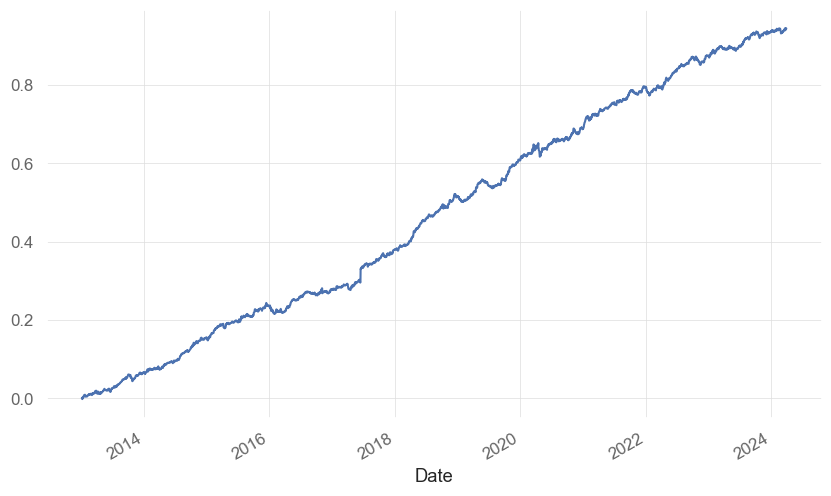

In [18]:

alpha = alpha_numerator / alpha_denominator
signal = alpha[not_tradable].rank(axis=1,pct=True,ascending=True).clip(0.01,0.99).apply(norm.ppf).loc['2013':]
signal = signal.sub(signal.mean(1),0)
# signal = signal.groupby(GICS['gicsect'],axis=1).apply(center).droplevel(axis=1,level=0)
signal = signal[not_tradable].div(signal[not_tradable].abs().sum(1),0) 
pnl = (signal.shift()[not_tradable]*R.sub(R.mean(1),0)).dropna(axis=0,how='all').sum(1).dropna()
sr = sharpe(pnl)
turnover = signal.fillna(0).diff().abs().sum(1).mean()
pnl.cumsum().plot()
print(pd.Series({'Sharpe':sr,
    'Daily Turnover (%)':turnover *100,
    'biais (bp)':pnl.mean()*1e4,
    'winning rate': pnl[pnl>0].shape[0] / pnl.shape[0],
    'Sharpe since 2024' : sharpe(pnl.loc['2024':]),
    'biais  since 2024 (bp)':pnl.loc['2024':].mean()*1e4}))

In [196]:
pnl.std()

6014.4135724529615

In [212]:

sr_monthly = pnl.groupby([pnl.index.year,pnl.index.month]).apply(sharpe).dropna()

In [213]:
sr_monthly_table = sr_monthly.unstack()
sr_monthly_table['mean'] = sr_monthly_table.mean(1)
sr_monthly_table.loc['mean'] = sr_monthly_table.mean(0)
sr_monthly_table

Date,1,2,3,4,5,6,7,8,9,10,11,12,mean
Date,,,,,,,,,,,,,
2013,2.079201,0.911242,8.419510,1.779201,4.255439,0.817855,2.115866,4.886904,8.937195,-1.233174,8.455807,8.549304,4.164529
2014,5.123307,6.590397,-0.947694,10.658306,5.212195,7.586148,4.537977,9.761928,8.318604,8.239743,7.633451,4.489162,6.433627
2015,5.238160,15.281520,5.104431,1.248946,6.974573,5.236000,6.130253,1.543429,5.503832,2.639302,2.183356,4.656966,5.145064
2016,-2.474869,4.578667,2.277804,4.578385,5.822642,6.211214,9.410018,-0.765577,-1.643308,2.574292,-0.152567,0.650778,2.588957
2017,0.948460,6.711732,-0.755351,-2.689192,4.086656,3.589652,2.458396,4.225055,6.623716,4.017590,5.668884,7.519461,3.533755
2018,3.835618,2.355647,4.274732,8.535689,7.503857,9.053069,3.984554,10.304989,5.805193,2.598431,9.220832,7.452894,6.243792
2019,1.649026,7.467335,6.106672,7.346516,6.665361,-2.682007,3.714388,2.872481,4.710384,6.509704,2.913940,11.460923,4.894560
2020,3.075471,3.016307,0.642701,-0.149510,2.373871,5.578418,2.731367,0.050323,0.919492,1.118702,3.893905,2.491353,2.145200
2021,7.895615,2.113734,0.099229,5.335001,7.108919,9.417403,2.012919,1.415840,12.428999,3.443312,0.918223,7.745192,4.994532
